In [4]:
from itertools import chain, combinations
from typing import Iterable, List, Optional, Tuple, Union

import numpy as np
import pandas as pd

from optimizer import FW
from utils import process_dataset

import networkx as nx

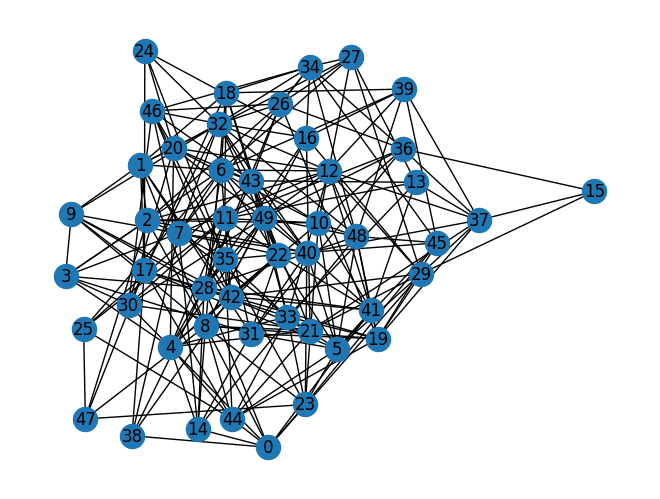

In [2]:
n = 50
p = 0.2
G = nx.erdos_renyi_graph(n, p, seed=10, directed=False) # trained graph seed 5
# G.add_edge(3, 7) for seed 5 to make 4 click
nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=2))

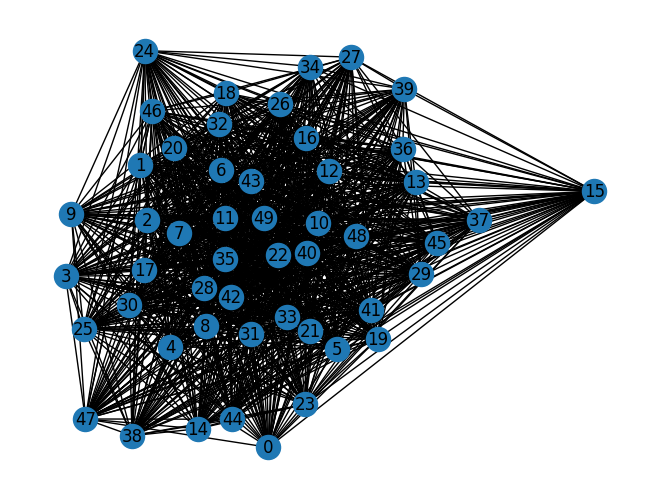

In [185]:
nx.draw(nx.complement(G), with_labels=True, pos=nx.spring_layout(G, seed=2))

In [3]:
existing_edges = []
for edge in G.edges():
    existing_edges.append(list(edge))

complement_edges = []
for comb in combinations(np.arange(n).tolist(), 2):
    if list(comb) in existing_edges:
        pass
    else:
        complement_edges.append(list(comb))

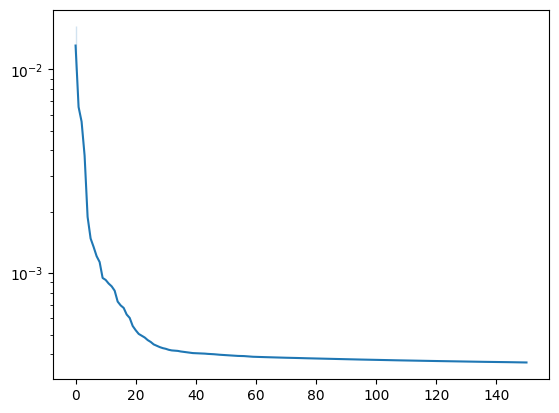

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=clasic_FW.histiry['iteration'], y=clasic_FW.histiry['of_value'])
plt.yscale('log');


# Real dataset

In [678]:
dataset = "johnson8-2-4.clq.txt"
with open(dataset) as file:
    edges = [list(map(int, line.rstrip()[2:].split(' '))) for line in file if line[0] == 'e']

old_node_index = list({i for edge in edges for i in edge})
old_node_index.sort()
n = len(old_node_index)
new_node_index = np.arange(n)
old_to_new = dict(zip(old_node_index, new_node_index))

def inner_map(edge, dict):
    l = [dict[node] for node in edge]
    l.sort()
    return l

existing_edges = [inner_map(edge, old_to_new) for edge in edges]

complement_edges = []
for comb in combinations(np.arange(n).tolist(), 2):
    if list(comb) in existing_edges:
        pass
    else:
        complement_edges.append(list(comb))

In [679]:
len(existing_edges), len(complement_edges)

(210, 168)

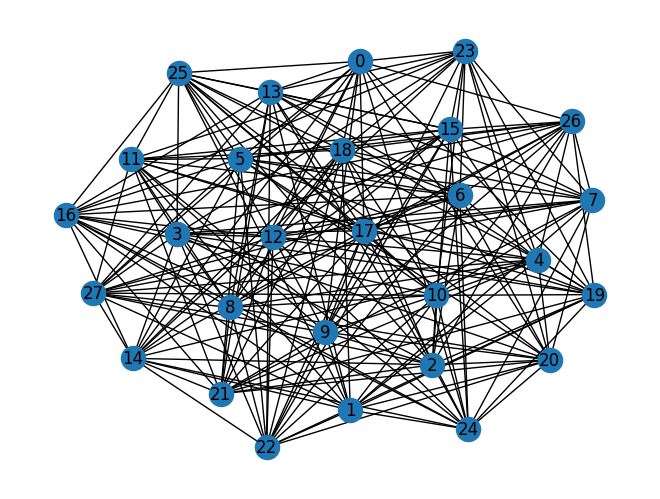

In [671]:
import networkx as nx
G = nx.from_edgelist(existing_edges)
nx.draw(G, with_labels=True)

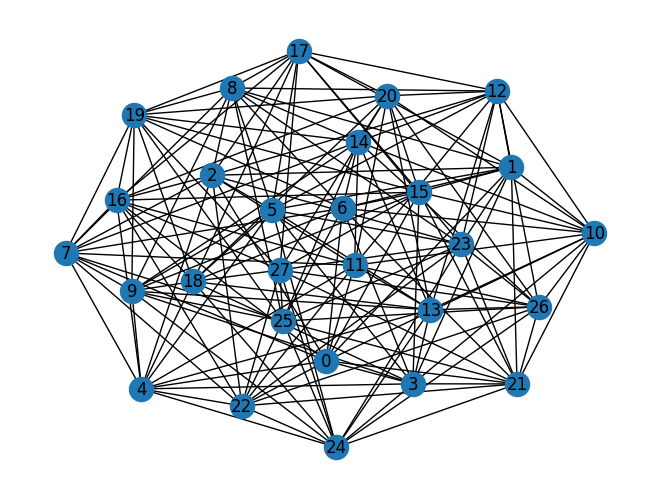

In [674]:
nx.draw(nx.complement(G), with_labels=True)

## Hypergraph

In [22]:
import importlib
import utils
import optimizer
import pandas as pd
importlib.reload(utils)
importlib.reload(optimizer)
from utils import process_dataset
from optimizer import FW
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = "instances/johnson8-2-4.clq.txt"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [396]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    for variant in variants:
        print(seed, variant)
        fw = FW(variant=variant)
        fw.optimize(complement_hyperedges, n, seed=seed)
        df_current = pd.DataFrame(fw.history)
        df_current['variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))
        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

0 FW
0 AFW
0 PFW
0 BPFW
1 FW
1 AFW
1 PFW
1 BPFW
2 FW
2 AFW
2 PFW
2 BPFW
3 FW
3 AFW
3 PFW
3 BPFW
4 FW
4 AFW
4 PFW
4 BPFW
5 FW
5 AFW
5 PFW
5 BPFW
6 FW
6 AFW
6 PFW
6 BPFW
7 FW
7 AFW
7 PFW
7 BPFW
global step
8 FW
8 AFW
8 PFW
8 BPFW
9 FW
9 AFW
9 PFW
9 BPFW
10 FW
10 AFW
10 PFW
10 BPFW
11 FW
11 AFW
11 PFW
11 BPFW
12 FW
12 AFW
12 PFW
12 BPFW
13 FW
13 AFW
13 PFW
13 BPFW
14 FW
14 AFW
14 PFW
14 BPFW
15 FW
15 AFW
15 PFW
15 BPFW
16 FW
16 AFW
16 PFW
16 BPFW
17 FW
17 AFW
17 PFW
17 BPFW
18 FW
18 AFW
18 PFW
18 BPFW
19 FW
19 AFW
19 PFW
19 BPFW
20 FW
20 AFW
20 PFW
20 BPFW
21 FW
21 AFW
21 PFW
21 BPFW
22 FW
22 AFW
22 PFW
22 BPFW
23 FW
23 AFW
23 PFW
23 BPFW
global step
24 FW
24 AFW
24 PFW
24 BPFW
25 FW
25 AFW
25 PFW
25 BPFW
26 FW
26 AFW
26 PFW
26 BPFW
27 FW
27 AFW
27 PFW
27 BPFW
28 FW
28 AFW
28 PFW
28 BPFW
29 FW
29 AFW
29 PFW
29 BPFW
30 FW
30 AFW
30 PFW
30 BPFW
31 FW
31 AFW
31 PFW
31 BPFW
32 FW
32 AFW
32 PFW
32 BPFW
33 FW
33 AFW
33 PFW
33 BPFW
34 FW
34 AFW
34 PFW
34 BPFW
35 FW
35 AFW
35 PFW
35 BPFW
36 FW
36

In [397]:
df_final = df[['variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'seed']).max().reset_index()
df_final[['variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant']).agg(['max','mean', 'std'])

iteration                     cpu_time                     max_clique   
              max    mean        std       max      mean       std        max   
variant                                                                         
AFW            47   42.16   2.526270  1.638235  1.027299  0.214903          6  \
BPFW           44   36.62   2.791313  1.098663  0.746645  0.122579          6   
FW            170  115.90  20.527980  9.845694  6.031433  1.436649          6   
PFW            44   36.82   2.730702  1.159758  0.761263  0.118116          6   

                         
         mean       std  
variant                  
AFW      6.00  0.000000  
BPFW     5.98  0.141421  
FW       6.00  0.000000  
PFW      5.98  0.141421

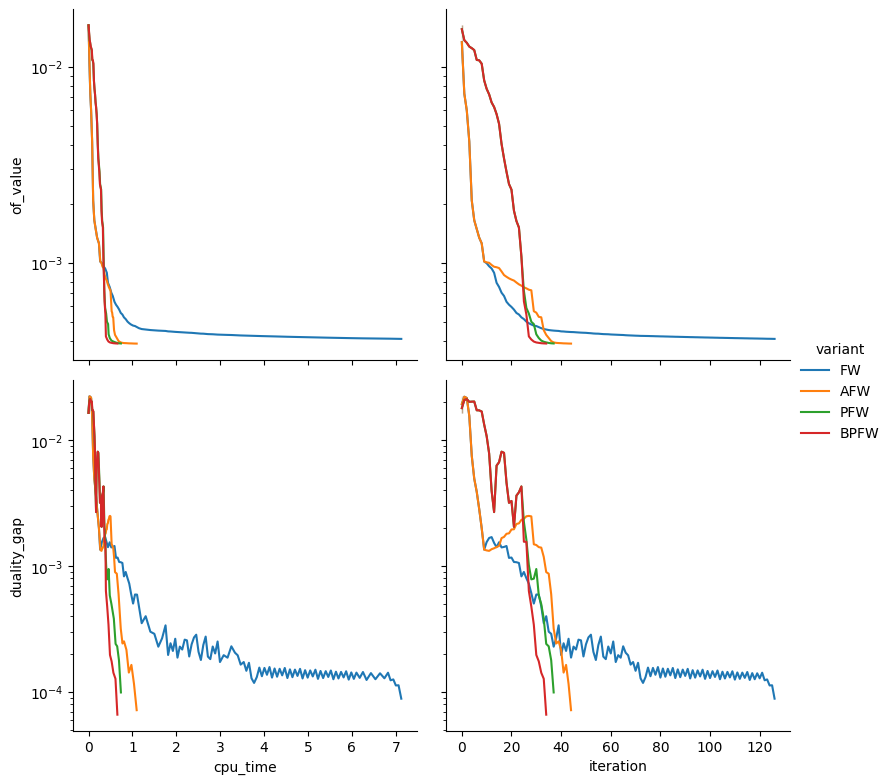

In [398]:
g = sns.PairGrid(df[df.seed == 48], y_vars=['of_value', 'duality_gap'], x_vars=["cpu_time", "iteration"], hue='variant', height=4)
g.map(sns.lineplot)
g.set(yscale="log")
g.add_legend();

## SSC procedure

In [25]:
dataset = "instances/hamming6-2.clq.txt"

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 630016, 5360)

In [29]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(2):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, stepsize_strategy = 'backtracking', ssc_procedure=ssc, tolerance=1e-6)
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            df_current['ssc'] = pd.Series([ssc] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

0 AFW True
0 AFW False
0 PFW True
0 PFW False
0 BPFW True
0 BPFW False
1 AFW True
1 AFW False
1 PFW True
1 PFW False
1 BPFW True
1 BPFW False


In [30]:
df_final = df[['variant', 'ssc', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'ssc', 'seed']).max().reset_index()
df_final[['variant', 'ssc', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'ssc']).agg(['max','mean', 'std'])

iteration                       cpu_time                        
                    max    mean         std        max       mean       std   
variant ssc                                                                   
AFW     False      3742  3615.0  179.605122  25.655813  25.020051  0.899103  \
        True       3699  3573.0  178.190909  34.459217  34.107295  0.497694   
BPFW    False      2671  2213.5  647.002705  18.085830  15.077064  4.255037   
        True       2464  2367.5  136.471609  25.005709  23.532100  2.083998   
PFW     False      2774  2265.0  719.834703  19.577498  17.003359  3.640382   
        True       2593  2432.0  227.688384  23.156941  21.619006  2.174968   

              max_clique                  
                     max  mean       std  
variant ssc                               
AFW     False         25  25.0  0.000000  
        True          25  25.0  0.000000  
BPFW    False         28  27.0  1.414214  
        True          28  27.0  1.414214  
PFW     False         28  27.0  1.414214  
        True          28  27.0  1.414214

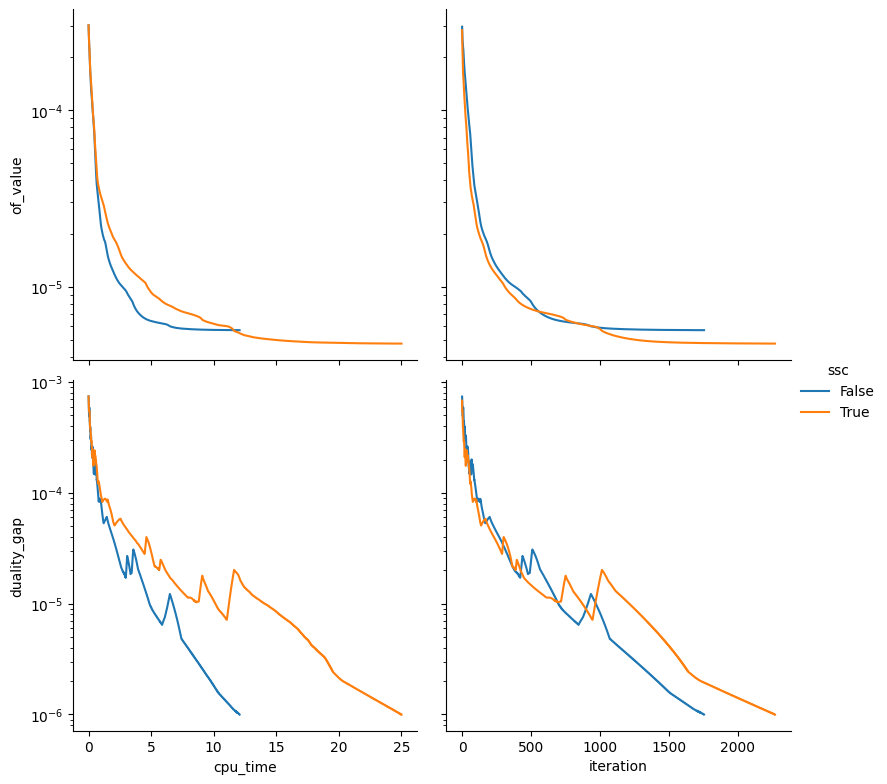

In [32]:
g = sns.PairGrid(df[(df.seed == 1)&(df.variant == 'BPFW')], y_vars=['of_value', 'duality_gap'], x_vars=["cpu_time", "iteration"], hue='ssc', height=4)
g.map(sns.lineplot)
g.set(yscale="log")
g.add_legend();

In [33]:
# tolerance 10-4 would work I think
dataset = "instances/hamming6-4.clq.txt"

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 61776, 573600)

In [44]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(0, 2):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, stepsize_strategy = 'backtracking', ssc_procedure=ssc, tolerance=1e-4)
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            df_current['ssc'] = pd.Series([ssc] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

0 AFW True
0 AFW False
0 PFW True
0 PFW False
0 BPFW True
0 BPFW False
1 AFW True
1 AFW False
1 PFW True
1 PFW False
1 BPFW True
1 BPFW False


In [45]:
df_final = df[['variant', 'ssc', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'ssc', 'seed']).max().reset_index()
df_final[['variant', 'ssc', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'ssc']).agg(['max','mean', 'std'])

iteration                      cpu_time                          
                    max   mean        std         max        mean        std   
variant ssc                                                                    
AFW     False       228  201.0  38.183766  199.139476  177.497090  30.606956  \
        True         57   56.5   0.707107  109.892289  106.799403   4.374001   
BPFW    False       120  119.0   1.414214  106.581143  102.984939   5.085800   
        True         45   38.5   9.192388   76.985747   70.164587   9.646577   
PFW     False       121  119.5   2.121320  112.568236  110.813731   2.481245   
        True         45   38.5   9.192388   77.079422   70.466607   9.351932   

              max_clique                 
                     max mean       std  
variant ssc                              
AFW     False          6  6.0  0.000000  
        True           6  6.0  0.000000  
BPFW    False          6  6.0  0.000000  
        True           6  5.5  0.707107  
PFW     False          6  6.0  0.000000  
        True           6  5.5  0.707107

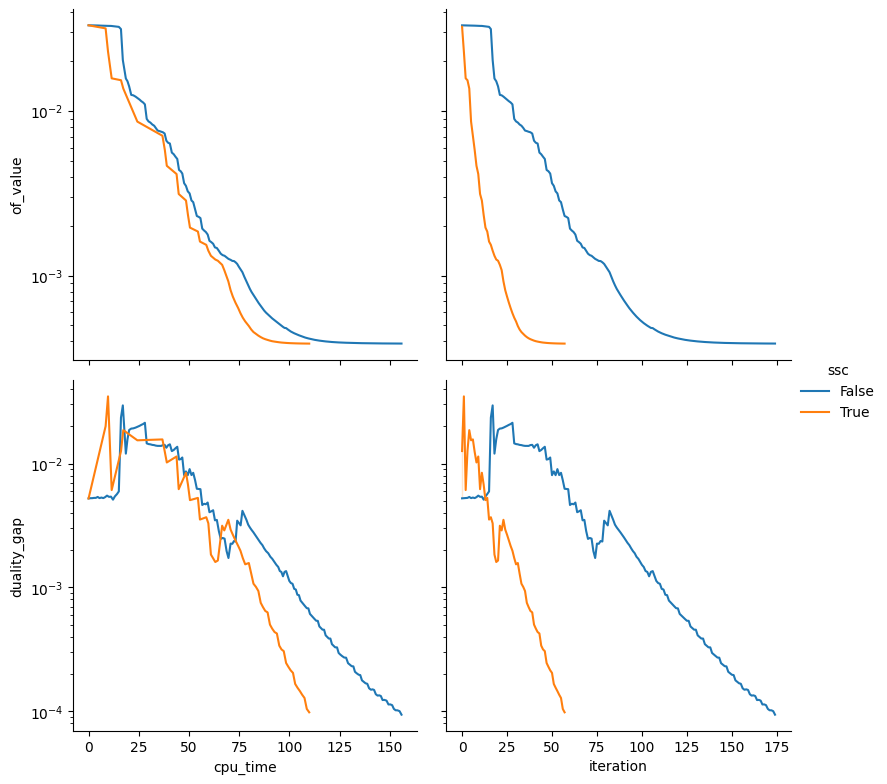

In [51]:
g = sns.PairGrid(df[(df.seed == 0)&(df.variant == 'AFW')], y_vars=['of_value', 'duality_gap'], x_vars=["cpu_time", "iteration"], hue='ssc', height=4)
g.map(sns.lineplot)
g.set(yscale="log")
g.add_legend();

# Other datasets

In [463]:
# dataset = "instances/johnson8-4-4.clq.txt", tolerance = 1e-5
# dataset = "instances/hamming6-2.clq.txt", tolerance = 1e-6
dataset = "instances/hamming6-2.clq.txt"

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 630016, 5360)

In [401]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(10):
    for variant in variants:
        print(seed, variant)
        fw = FW(variant=variant, tolerance=1e-6)
        fw.optimize(complement_hyperedges, n, seed=seed)
        df_current = pd.DataFrame(fw.history)
        df_current['variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))
        max_clique = (fw.x > 0.0001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

0 FW
0 AFW
0 PFW
0 BPFW
global step
global step
1 FW
1 AFW
1 PFW
1 BPFW
2 FW
2 AFW
2 PFW
2 BPFW
global step
3 FW
3 AFW
3 PFW
3 BPFW
global step
4 FW
4 AFW
4 PFW
4 BPFW
5 FW
5 AFW
5 PFW
5 BPFW
global step
global step
6 FW
6 AFW
6 PFW
6 BPFW
7 FW
7 AFW
7 PFW
7 BPFW
8 FW
8 AFW
8 PFW
8 BPFW
global step
9 FW
9 AFW
9 PFW
9 BPFW
global step
global step


In [402]:
df_final = df[['variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant', 'seed']).max().reset_index()
df_final[['variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['variant']).agg(['max','mean', 'std'])

iteration                      cpu_time                        
              max   mean         std        max       mean       std   
variant                                                                
AFW           125  113.4   11.520031   2.773998   2.170110  0.391257  \
BPFW          101   96.0    4.294700   1.875816   1.428782  0.246024   
FW           1014  802.6  107.860198  41.714907  31.912042  5.190643   
PFW           114  100.0    8.576454   2.002850   1.548257  0.312350   

        max_clique                  
               max  mean       std  
variant                             
AFW             28  26.2  1.751190  
BPFW            28  25.7  1.337494  
FW              28  25.7  1.159502  
PFW             28  25.7  1.337494

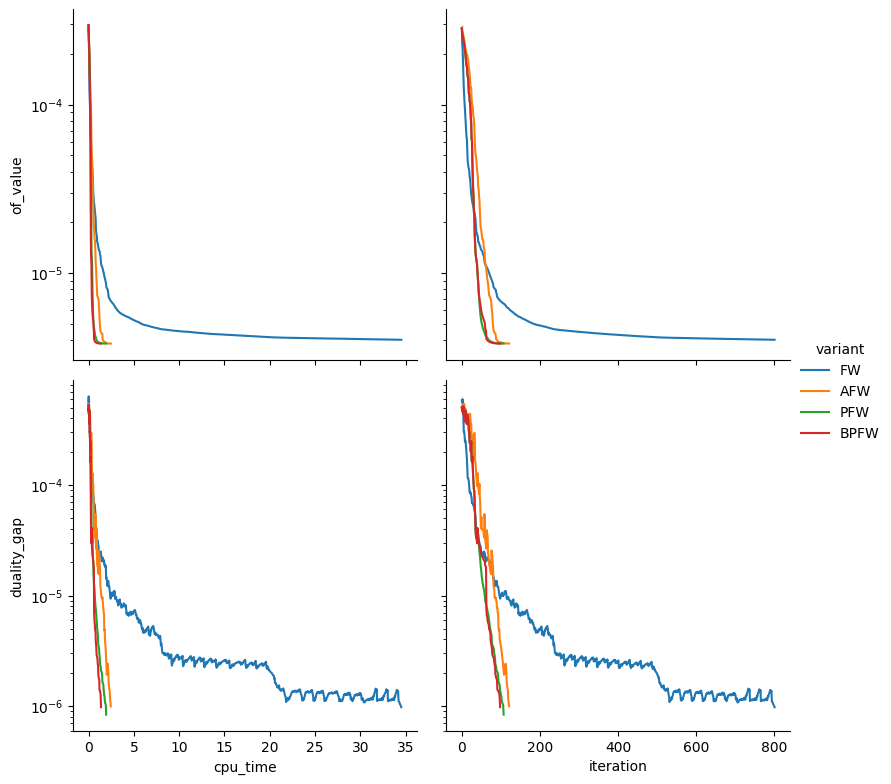

In [409]:
g = sns.PairGrid(df[df.seed == 5], y_vars=['of_value', 'duality_gap'], x_vars=["cpu_time", "iteration"], hue='variant', height=4)
g.map(sns.lineplot)
g.set(yscale="log")
g.add_legend();

In [24]:
dataset = "instances/keller4.clq.txt"

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(171, 22542096, 11847714)

In [471]:
variants = ["PFW"]
df = pd.DataFrame()
for seed in range(1):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, stepsize_strategy = 'backtracking', ssc_procedure=ssc)
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            df_current['ssc'] = pd.Series([ssc] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

0 PFW True


KeyboardInterrupt: 

In [482]:
fw.x[complement_hyperedges].prod(axis=1).sum()

0.0126849817131568

In [478]:
len(complement_hyperedges)

11847714

In [483]:
fw.calc_gradient(complement_hyperedges)

array([0.04267834, 0.04331859, 0.04268229, 0.04034669, 0.04146747,
       0.03904111, 0.04533908, 0.0389079 , 0.05183134, 0.04791685,
       0.05074303, 0.04987191, 0.03741797, 0.04042957, 0.03826945,
       0.03833671, 0.0537445 , 0.04965769, 0.05002894, 0.0334655 ,
       0.05422516, 0.0523062 , 0.0491185 , 0.0387395 , 0.05381172,
       0.05276216, 0.04709315, 0.03832363, 0.04601023, 0.03965998,
       0.0498958 , 0.04947865, 0.05006738, 0.04799332, 0.04257859,
       0.05000903, 0.04322355, 0.05317573, 0.04948805, 0.05304239,
       0.04762463, 0.05296115, 0.0573838 , 0.053451  , 0.06011675,
       0.05333495, 0.05970979, 0.05547592, 0.04512118, 0.05191352,
       0.04787412, 0.05021405, 0.05248972, 0.06113587, 0.05378285,
       0.05755478, 0.05343479, 0.0605494 , 0.05463825, 0.06113071,
       0.05201177, 0.05950189, 0.05374409, 0.0579697 , 0.05322797,
       0.05073052, 0.0513225 , 0.05946821, 0.05472138, 0.05894309,
       0.05344515, 0.04210445, 0.04060875, 0.04208595, 0.04359